# 🔍 Filters & Convolution

**Understanding how computers "see" patterns in images**

Last week: Images → Tensors  
This week: How to process those tensors!

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

print("✅ Ready to explore filters!")

✅ Ready to explore filters!


## 1. What's a Filter?

A filter is a small grid of numbers that we slide across an image to detect patterns.

In [2]:
# Let's create a simple 3x3 image (like last week)
simple_image = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=torch.float32)

print("Simple 3x3 image:")
print(simple_image)

# Create a simple 2x2 filter
simple_filter = torch.tensor([
    [1, 0],
    [0, 1]
], dtype=torch.float32)

print("\nSimple 2x2 filter:")
print(simple_filter)

Simple 3x3 image:
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Simple 2x2 filter:
tensor([[1., 0.],
        [0., 1.]])


## 2. Manual Convolution: Sliding Window

Let's slide our 2x2 filter across the 3x3 image:


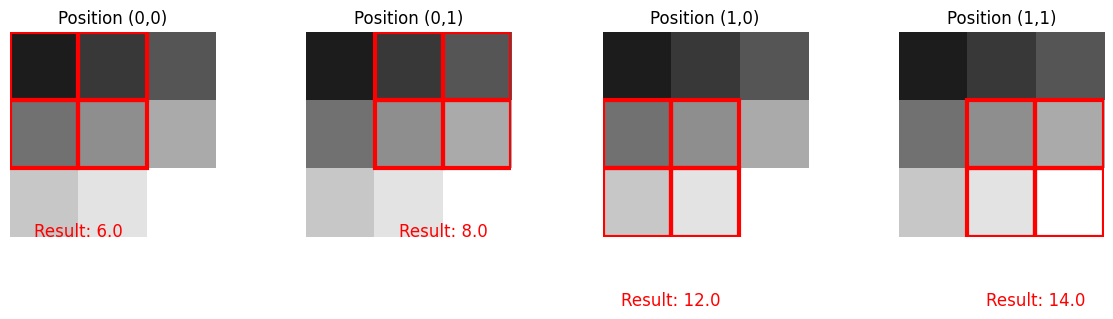


We slide the filter, multiply, and sum!
This is called CONVOLUTION.


In [3]:
# Let's do convolution manually!
print("Let's slide our 2x2 filter across the 3x3 image:")

# Visualize
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

positions = [(0,0), (0,1), (1,0), (1,1)]

for i, (row, col) in enumerate(positions):
    axes[i].imshow(simple_image, cmap='gray', vmin=0, vmax=9)
    axes[i].set_title(f"Position ({row},{col})")
    axes[i].axis('off')
    
    # Highlight the area the filter covers
    for r in range(2):
        for c in range(2):
            axes[i].add_patch(plt.Rectangle((col+c-0.5, row+r-0.5), 1, 1,
                                           fill=False, edgecolor='red', linewidth=3))
            
    # Calculate the result
    result = 0
    for fr in range(2):
        for fc in range(2):
            result += simple_image[row+fr, col+fc] * simple_filter[fr, fc]
    
    axes[i].text(col+0.5, row+2.5, f"Result: {result:.1f}", 
                ha='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

print("\nWe slide the filter, multiply, and sum!")
print("This is called CONVOLUTION.")

Full convolution result:
tensor([[ 6.,  8.],
        [12., 14.]])

Input shape: torch.Size([3, 3])
Filter shape: torch.Size([2, 2])
Output shape: torch.Size([2, 2])


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


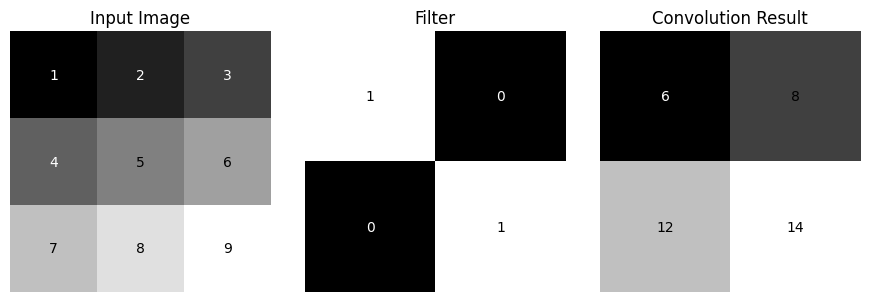

In [4]:
# Let's see the full convolution result
# Add batch and channel dimensions (needed for PyTorch)
image_3d = simple_image.unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, 3, 3]
filter_4d = simple_filter.unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, 2, 2]

# Perform convolution
result = F.conv2d(image_3d, filter_4d)

print("Full convolution result:")
print(result.squeeze())
print(f"\nInput shape: {simple_image.shape}")
print(f"Filter shape: {simple_filter.shape}")
print(f"Output shape: {result.squeeze().shape}")

# Show comparison
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

images = [simple_image, simple_filter, result.squeeze()]
titles = ["Input Image", "Filter", "Convolution Result"]

for i, (img, title) in enumerate(zip(images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')
    
    # Add values
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            axes[i].text(c, r, f"{img[r,c]:.0f}", 
                        ha='center', va='center', 
                        color='white' if img[r,c] < img.max()/2 else 'black')

plt.tight_layout()
plt.show()

## 3. Real Example: Edge Detection

Real image shape: torch.Size([3, 32, 32])
Grayscale shape: torch.Size([1, 32, 32])


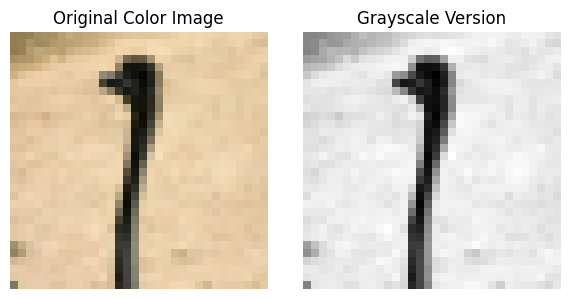

In [ ]:
# Load a real image from CIFAR-10
transform = transforms.ToTensor()
cifar_data = datasets.CIFAR10(root='./data', train=True, transform=transform)

real_image, label = cifar_data[41]  # Get a random image (eg., 1, 7, 13, 29, 41, etc.)
real_image_gray = real_image.mean(dim=0, keepdim=True)  # Convert to grayscale

print(f"Real image shape: {real_image.shape}")
print(f"Grayscale shape: {real_image_gray.shape}")

# Show the image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(real_image.permute(1, 2, 0))
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_image_gray.squeeze(), cmap='gray')
plt.title("Grayscale Version")
plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Common Filters You Should Know

Let's look at 3 important filters:


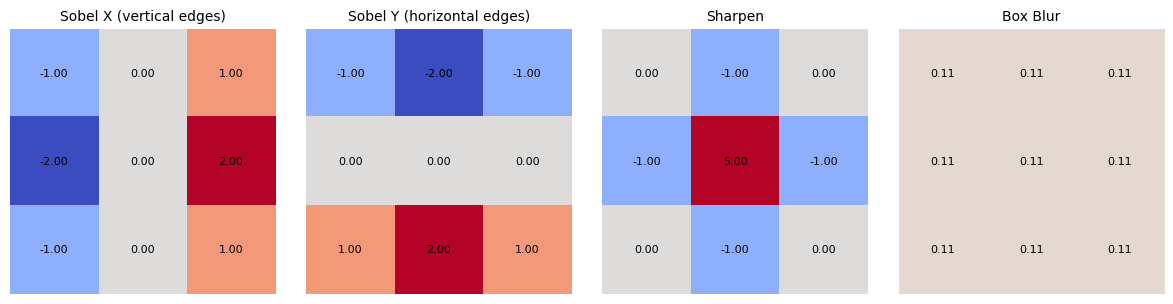


Look at the patterns:
• Sobel X: Detects vertical edges (left vs right)
• Sobel Y: Detects horizontal edges (top vs bottom)
• Sharpen: Makes edges more visible
• Blur: Averages nearby pixels to smooth


In [6]:
# Define some common filters
print("Let's look at 3 important filters:")

# 1. Edge detection (Sobel)
sobel_x = torch.tensor([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=torch.float32)

sobel_y = torch.tensor([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=torch.float32)

# 2. Sharpen
sharpen = torch.tensor([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=torch.float32)

# 3. Blur
blur = torch.tensor([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
], dtype=torch.float32)

# Display the filters
filters = [sobel_x, sobel_y, sharpen, blur]
names = ["Sobel X (vertical edges)", "Sobel Y (horizontal edges)", 
         "Sharpen", "Box Blur"]

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i, (filt, name) in enumerate(zip(filters, names)):
    axes[i].imshow(filt, cmap='coolwarm', vmin=-2, vmax=2)
    axes[i].set_title(name, fontsize=10)
    axes[i].axis('off')
    
    # Add values
    for r in range(3):
        for c in range(3):
            axes[i].text(c, r, f"{filt[r,c]:.2f}", 
                        ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\nLook at the patterns:")
print("• Sobel X: Detects vertical edges (left vs right)")
print("• Sobel Y: Detects horizontal edges (top vs bottom)")
print("• Sharpen: Makes edges more visible")
print("• Blur: Averages nearby pixels to smooth")

## 5. Apply Filters to Real Images

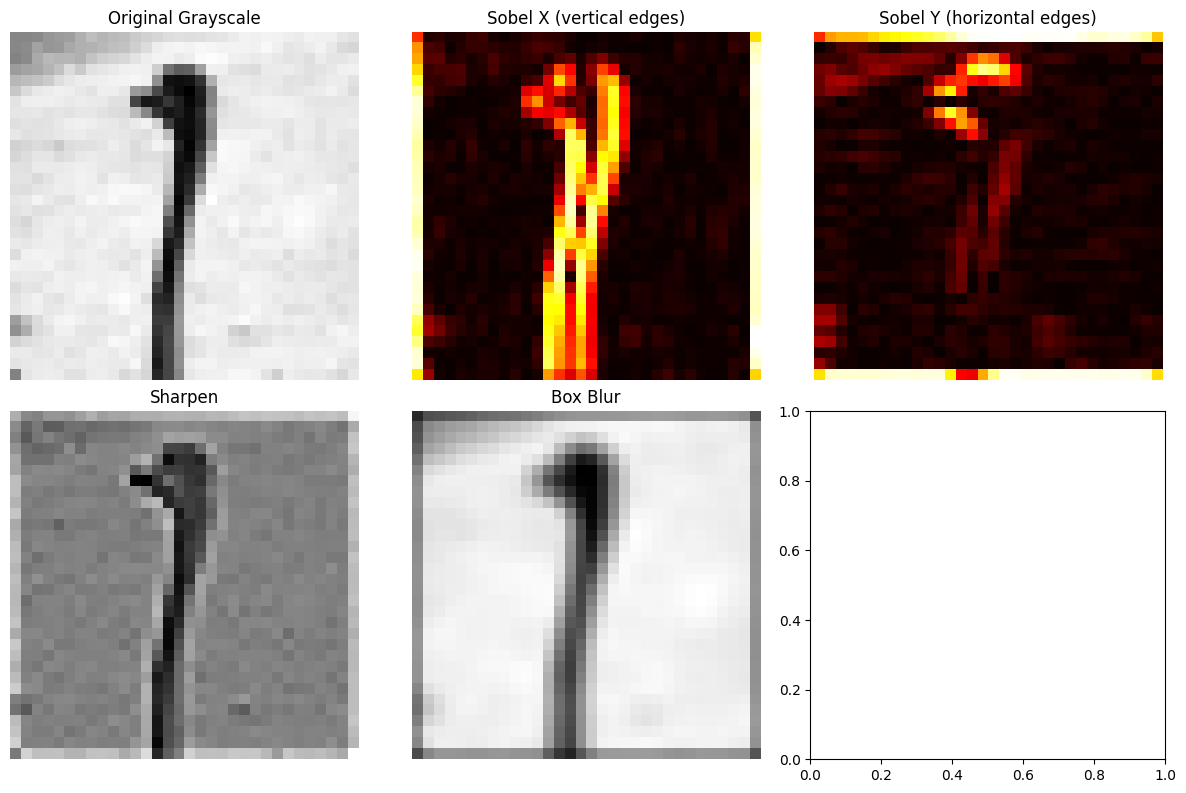

Notice how different filters highlight different features!


In [75]:
# Apply filters to our grayscale image
# Prepare for convolution (add batch and channel dimensions)
image_ready = real_image_gray.unsqueeze(0)  # Shape: [1, 1, 32, 32]

# Convert filters to right shape
def apply_filter(image, filter_2d):
    """Apply a 2D filter to an image"""
    filter_ready = filter_2d.unsqueeze(0).unsqueeze(0)  # [1, 1, 3, 3]
    result = F.conv2d(image, filter_ready, padding=1)  # padding keeps same size
    return result

# Apply all filters
results = []
for filt in filters:
    result = apply_filter(image_ready, filt)
    results.append(result.squeeze())  # Remove batch and channel dims

# Display results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

all_images = [real_image_gray.squeeze()] + results
all_titles = ["Original Grayscale"] + names

for i, (img, title) in enumerate(zip(all_images, all_titles)):
    row, col = divmod(i, 3)
    
    # Normalize for display (edges can be negative)
    if "Sobel" in title:
        img_display = torch.abs(img)  # Take absolute value for edges
        cmap = 'hot'
    else:
        img_display = img
        cmap = 'gray'
    
    axes[row, col].imshow(img_display, cmap=cmap)
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("Notice how different filters highlight different features!")

## 6. Understanding What Each Filter Does

Let's create an image with clear edges:


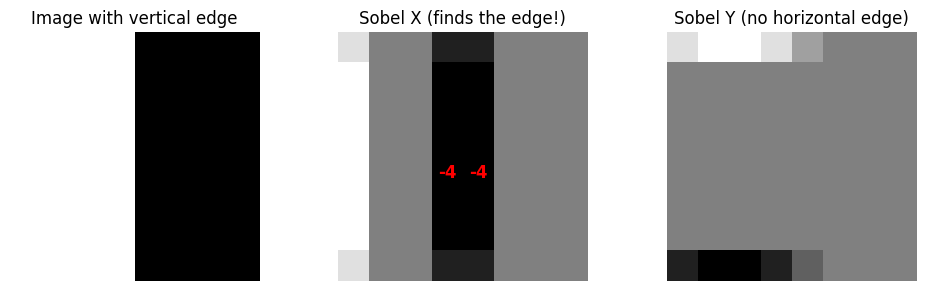


The magic of Sobel X:
• Where pixels change from 1→0 (the edge), we get high values!
• Sobel Y doesn't find this edge because it looks for top/bottom changes.


In [8]:
# Let's look at a simpler example to understand better
print("Let's create an image with clear edges:")

# Create a simple image with an edge
edge_image = torch.zeros((8, 8))
edge_image[:, :4] = 1  # Left half = 1, right half = 0

# Apply Sobel filters
edge_image_ready = edge_image.unsqueeze(0).unsqueeze(0)
sobel_x_result = apply_filter(edge_image_ready, sobel_x).squeeze()
sobel_y_result = apply_filter(edge_image_ready, sobel_y).squeeze()

# Display
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

images = [edge_image, sobel_x_result, sobel_y_result]
titles = ["Image with vertical edge", "Sobel X (finds the edge!)", "Sobel Y (no horizontal edge)"]

for i, (img, title) in enumerate(zip(images, titles)):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')
    
    # Add some values
    if i == 1:  # Sobel X result
        axes[i].text(3, 4, f"{img[4,3]:.0f}", ha='center', va='center', 
                    color='red', fontsize=12, fontweight='bold')
        axes[i].text(4, 4, f"{img[4,4]:.0f}", ha='center', va='center', 
                    color='red', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nThe magic of Sobel X:")
print("• Where pixels change from 1→0 (the edge), we get high values!")
print("• Sobel Y doesn't find this edge because it looks for top/bottom changes.")

## 7. Multiple Filters at Once

Neural networks use MANY filters to learn different patterns.
Multiple filters shape: torch.Size([4, 3, 3])
This means: 4 filters, each 3x3

Results shape: torch.Size([1, 4, 32, 32])
This means: 4 output images, each 32x32


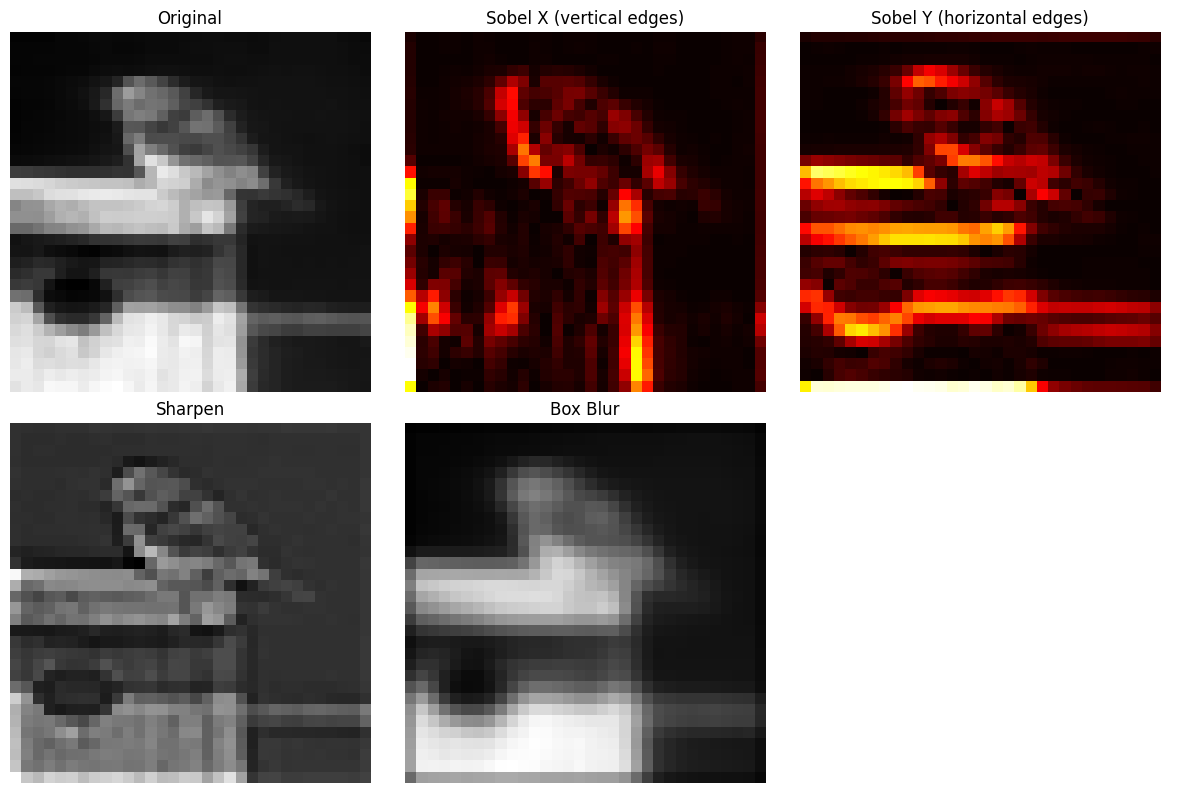


This is exactly what happens in a neural network layer!


In [43]:
# In neural networks, we use multiple filters!
print("Neural networks use MANY filters to learn different patterns.")

# Create 4 different filters
multiple_filters = torch.stack([
    sobel_x,
    sobel_y,
    sharpen,
    blur
])  # Shape: [4, 3, 3] → 4 filters, each 3x3

print(f"Multiple filters shape: {multiple_filters.shape}")
print(f"This means: 4 filters, each 3x3")

# Prepare for convolution
filters_4d = multiple_filters.unsqueeze(1)  # Shape: [4, 1, 3, 3]
image_4d = real_image_gray.unsqueeze(0)  # Shape: [1, 1, 32, 32]

# Apply all 4 filters at once!
multiple_results = F.conv2d(image_4d, filters_4d, padding=1)

print(f"\nResults shape: {multiple_results.shape}")
print("This means: 4 output images, each 32x32")

# Display all results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original + 4 filter results
display_images = [real_image_gray.squeeze()] + [multiple_results[0, i] for i in range(4)]
display_titles = ["Original"] + names

for i, (img, title) in enumerate(zip(display_images, display_titles)):
    row, col = divmod(i, 3)
    
    # Choose colormap
    if i == 0:
        cmap = 'gray'
    elif i in [1, 2]:  # Sobel filters
        cmap = 'hot'
        img = torch.abs(img)
    else:
        cmap = 'gray'
    
    axes[row, col].imshow(img, cmap=cmap)
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

# Hide empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\nThis is exactly what happens in a neural network layer!")

## 8. From Filters to Neural Networks

In [10]:
print("=" * 50)
print("CONNECTING TO NEURAL NETWORKS")
print("=" * 50)

print("\nIn a CNN (Convolutional Neural Network):")
print()
print("1️⃣ Each filter learns to detect a specific pattern")
print("   • Edge at 45°")
print("   • Circle")
print("   • Texture")
print()
print("2️⃣ Early layers learn simple patterns (edges, corners)")
print()
print("3️⃣ Later layers combine these to recognize complex objects")
print("   • Edges → Corners → Parts → Objects")

# Simple CNN layer example
class SimpleConvLayer(torch.nn.Module):
    def __init__(self, num_filters=4):
        super().__init__()
        self.conv = torch.nn.Conv2d(
            in_channels=1,      # Grayscale input
            out_channels=num_filters,  # Number of filters
            kernel_size=3,      # 3x3 filters
            padding=1           # Keep same size
        )
        
        # Initialize with our filters (normally learned from data)
        with torch.no_grad():
            for i in range(min(num_filters, 4)):
                self.conv.weight[i] = filters_4d[i]
    
    def forward(self, x):
        return self.conv(x)

# Create and test
conv_layer = SimpleConvLayer(num_filters=4)
result = conv_layer(image_4d)

print(f"\nSimple CNN layer output shape: {result.shape}")
print("Same as our manual convolution!")

CONNECTING TO NEURAL NETWORKS

In a CNN (Convolutional Neural Network):

1️⃣ Each filter learns to detect a specific pattern
   • Edge at 45°
   • Circle
   • Texture

2️⃣ Early layers learn simple patterns (edges, corners)

3️⃣ Later layers combine these to recognize complex objects
   • Edges → Corners → Parts → Objects

Simple CNN layer output shape: torch.Size([1, 4, 32, 32])
Same as our manual convolution!


## 9. Your Turn: Create Your Own Filter!

Create your own 3x3 filter and see what it does!

Your filter:
tensor([[ 0.,  1.,  0.],
        [ 1., -4.,  1.],
        [ 0.,  1.,  0.]])


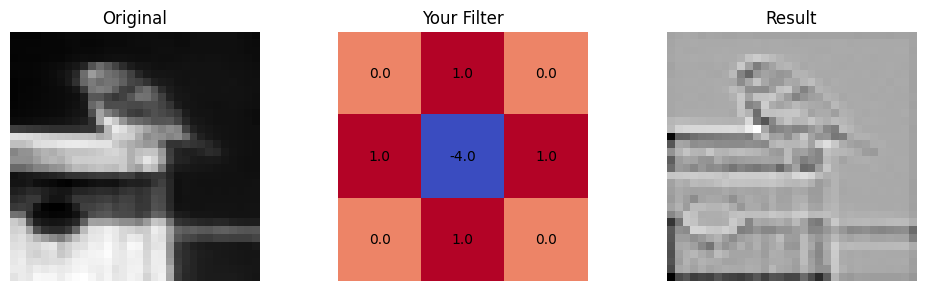


What does your filter detect?


In [44]:
print("Create your own 3x3 filter and see what it does!")

# Try changing these values!
my_filter = torch.tensor([
    [0.0, 1.0, 0.0],
    [1.0, -4.0, 1.0],
    [0.0, 1.0, 0.0]
], dtype=torch.float32)

# Or try one of these:
# [[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9  # Another blur
# [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]  # Edge detector
# [[0, 0, 0], [0, 1, 0], [0, 0, 0]]  # Identity (does nothing)

print("\nYour filter:")
print(my_filter)

# Apply it
my_result = apply_filter(image_ready, my_filter)

# Display
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].imshow(real_image_gray.squeeze(), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(my_filter, cmap='coolwarm', vmin=-4, vmax=1)
axes[1].set_title("Your Filter")
axes[1].axis('off')
for r in range(3):
    for c in range(3):
        axes[1].text(c, r, f"{my_filter[r,c]:.1f}", 
                    ha='center', va='center', fontsize=10)

axes[2].imshow(my_result.squeeze(), cmap='gray')
axes[2].set_title("Result")
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nWhat does your filter detect?")

## 10. Important Concepts

In [12]:
print("=" * 50)
print("KEY CONCEPTS")
print("=" * 50)

concepts = {
    "Kernel/Filter": "Small grid of numbers that detects patterns",
    "Convolution": "Sliding the filter across the image, multiplying and summing",
    "Padding": "Adding zeros around the image to keep same size",
    "Stride": "How many pixels to move the filter (usually 1)",
    "Feature Map": "The output after applying a filter",
    "Channels": "Different filters create different output channels"
}

for concept, explanation in concepts.items():
    print(f"\n📌 {concept}:")
    print(f"   {explanation}")

KEY CONCEPTS

📌 Kernel/Filter:
   Small grid of numbers that detects patterns

📌 Convolution:
   Sliding the filter across the image, multiplying and summing

📌 Padding:
   Adding zeros around the image to keep same size

📌 Stride:
   How many pixels to move the filter (usually 1)

📌 Feature Map:
   The output after applying a filter

📌 Channels:
   Different filters create different output channels


## 11. Summary: The Big Picture

In [13]:
print("=" * 50)
print("🎯 SUMMARY: FROM FILTERS TO NEURAL NETWORKS")
print("=" * 50)

print("\n1️⃣ Images are tensors [C, H, W] (from last week)")
print("2️⃣ Filters are small tensors [k, k] that detect patterns")
print("3️⃣ Convolution applies filters to find features")
print("4️⃣ Multiple filters = multiple feature detectors")
print("5️⃣ Neural networks LEARN the best filters from data!")

print("\n" + "-" * 50)
print("What's next week?")
print("We'll build a neural network that learns its own filters!")
print("-" * 50)

🎯 SUMMARY: FROM FILTERS TO NEURAL NETWORKS

1️⃣ Images are tensors [C, H, W] (from last week)
2️⃣ Filters are small tensors [k, k] that detect patterns
3️⃣ Convolution applies filters to find features
4️⃣ Multiple filters = multiple feature detectors
5️⃣ Neural networks LEARN the best filters from data!

--------------------------------------------------
What's next week?
We'll build a neural network that learns its own filters!
--------------------------------------------------


## Quick Quiz (Run to Check)

In [14]:
print("Quick understanding check:\n")

questions = [
    "What does a Sobel X filter detect?",
    "What shape is a 3x3 filter applied to a 32x32 image?",
    "Why do we use multiple filters in a CNN layer?"
]

answers = [
    "Vertical edges (left vs right differences)",
    "[3, 3] (it's a small grid)",
    "To detect different patterns/features in the image"
]

for i, (q, a) in enumerate(zip(questions, answers), 1):
    print(f"Q{i}: {q}")
    print(f"A{i}: {a}\n")

Quick understanding check:

Q1: What does a Sobel X filter detect?
A1: Vertical edges (left vs right differences)

Q2: What shape is a 3x3 filter applied to a 32x32 image?
A2: [3, 3] (it's a small grid)

Q3: Why do we use multiple filters in a CNN layer?
A3: To detect different patterns/features in the image



---

<p style="text-align: right; font-size:14px; color:gray;">
<b>Prepared by:</b><br>
Manuel Eugenio Morocho-Cayamcela
</p>